In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# using 2020 survey data
df = pd.read_csv('/work/Survey Data/2020_brightside_data.csv')
df.head()

,RespondentID,newid,collectorid,location,date,nbr_relation,sense_commun,safe_violence,safe_covid,food_enough,...,bside_dur,bside_pre,bside_pre_other,bside_pre_muni,bside_pre_muni_other,surv_feedback,surv_who,surv_who_other,surv_hear,surv_hear_other
0,1.100050e+11,5085857,270167554,LONDONDERRY,8/11/2020 19:02,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,NaN,0.0,Burnaby,NaN,1.0,NaN,2.0,NaN
1,1.100050e+11,5135726,270167553,LIONS VIEW BLDG III,8/19/2020 13:37,2.0,2.0,2.0,3.0,1.0,...,3.0,0.0,Lived with my partner until the relationship e...,0.0,Pitt Meadows,I really would like that the building gets a b...,1.0,NaN,3.0,NaN
2,1.100050e+11,5213106,270167559,MOUNT PLEASANT,8/30/2020 20:26,NaN,2.0,NaN,0.0,NaN,...,4.0,3.0,NaN,1.0,NaN,NaN,1.0,NaN,2.0,NaN
3,1.100050e+11,5213123,270167561,WALLACE WILSON,8/30/2020 20:33,2.0,3.0,3.0,3.0,2.0,...,2.0,7.0,NaN,0.0,North Vancouver,NaN,1.0,NaN,2.0,NaN
4,1.100050e+11,5213195,270167561,WALLACE WILSON,8/30/2020 20:50,3.0,3.0,2.0,3.0,1.0,...,3.0,2.0,NaN,0.0,Burnaby,I am very thankful for Brightside for making m...,1.0,NaN,1.0,NaN


In [2]:
df.info()
# only 223 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Columns: 237 entries, RespondentID to surv_hear_other
dtypes: float64(187), int64(2), object(48)
memory usage: 413.0+ KB


In [3]:
N = len(df)
perc = (df.isnull().sum()) / N *100
# variables with more than 10% null values
perc_null = perc [ perc > 10].to_frame()
#print(len(perc_null.index.tolist()))
perc_null_index = perc_null.index.tolist()
# out of 237 columns, 138 columns had more than 25% null
# may be important questions, but non-contributory answers 
##  -> remove for this analysis
##  -> suggest review relevance to survey questionnaire
##  -> question: is questionnaire probably too long?

df2 = df.drop(perc_null_index, axis=1)

In [4]:
df2.drop(['RespondentID', 'collectorid', 'newid', 'date'], axis = 1, inplace=True)

# initial exploration at survey2020 showed blanks at id_***
df2.replace(r'^\s*$', np.nan, regex=True, inplace=True)
perc2 = ((df2.isnull().sum() / len(df2))*100).round(0)
null2 = perc2 [perc2 > 10]

null_index2 = null2.index.tolist()

df3 = df2.drop(null_index2, axis = 1)

In [5]:
#df3.hist(figsize = (12,12))
#plt.subplots_adjust(hspace=0.8, wspace = 0.8);
# -> replace NA with mode

In [105]:
df4 = df3.copy()

df4.nbr_relation.replace(np.nan, 2.0, inplace=True)
df4.sense_commun.replace(np.nan, 2.0, inplace=True)
df4.safe_covid.replace(np.nan, 2.0, inplace=True)
df4.food_enough.replace(np.nan, 1.0, inplace=True)
df4.food_access.replace(np.nan, 1.0, inplace=True)
df4.food_variety.replace(np.nan, 1.0, inplace=True)
df4.food_afford.replace(np.nan, 1.0, inplace=True)
df4.food_worry.replace(np.nan, 1.0, inplace=True)
df4.covid_info_satis.replace(np.nan, 1.0, inplace=True)
df4.covid_brief_satis.replace(np.nan, 2.0, inplace=True)
df4.house_stable.replace(np.nan, 2.0, inplace=True)
df4.apprch_bside.replace(np.nan, 1.0, inplace=True)
df4.comm_reg.replace(np.nan, 2.0, inplace=True)
df4.comm_news_satisf.replace(np.nan, 2.0, inplace=True)
df4.depm_admin.replace(np.nan, 5.0, inplace=True)
df4.depm_oper.replace(np.nan, 5.0, inplace=True)
df4.food_access_last_12.replace(np.nan, 1.0, inplace=True)
df4.hlth_phys.replace(np.nan, 3.0, inplace=True)
df4.hlth_mental.replace(np.nan, 3.0, inplace=True)
df4.hlth_happy.replace(np.nan, 2.0, inplace=True)
df4.hlth_well.replace(np.nan, 1.0, inplace=True)
df4.time_nbr.replace(np.nan, 1.0, inplace=True)
df4.nbr_relation_better.replace(np.nan, 2.0, inplace=True)
df4.chat_often.replace(np.nan, 2.0, inplace=True)
df4.num_close_friends.replace(np.nan, 2.0, inplace=True)
df4.unsafe_area.replace(np.nan, 1.0, inplace=True)
df4.rlns_care.replace(np.nan, 4.0, inplace=True)
df4.rlns_welcome.replace(np.nan, 4.0, inplace=True)
df4.rlns_space.replace(np.nan, 4.0, inplace=True)
df4.rlns_safe.replace(np.nan, 4.0, inplace=True)
df4.rlns_safe_obj.replace(np.nan, 4.0, inplace=True)
df4.age.replace(np.nan, 8.0, inplace=True)
df4.gender.replace(np.nan, 1.0, inplace=True)
df4.household.replace(np.nan, 1.0, inplace=True)
df4.num_child.replace(np.nan, 1.0, inplace=True)
df4.rln_status.replace(np.nan, 1.0, inplace=True)
df4.work_paid.replace(np.nan, 3.0, inplace=True)
df4.work_vol.replace(np.nan, 3.0, inplace=True)
df4.walk_aid.replace(np.nan, 2.0, inplace=True)
df4.educ_level.replace(np.nan, 3.0, inplace=True)
df4.imm_status.replace(np.nan, 1.0, inplace=True)
df4.bside_dur.replace(np.nan, 4.0, inplace=True)
df4.bside_pre.replace(np.nan, 2.0, inplace=True)
df4.bside_pre_muni.replace(np.nan, 1.0, inplace=True)
df4.surv_who.replace(np.nan, 1.0, inplace=True)
df4.surv_hear.replace(np.nan, 2.0, inplace=True)

In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             223 non-null    object 
 1   nbr_relation         223 non-null    float64
 2   sense_commun         223 non-null    float64
 3   safe_covid           223 non-null    float64
 4   food_enough          223 non-null    float64
 5   food_access          223 non-null    float64
 6   food_variety         223 non-null    float64
 7   food_afford          223 non-null    float64
 8   food_worry           223 non-null    float64
 9   covid_info_satis     223 non-null    float64
 10  covid_brief_satis    223 non-null    float64
 11  house_stable         223 non-null    float64
 12  apprch_bside         223 non-null    float64
 13  comm_reg             223 non-null    float64
 14  comm_news_satisf     223 non-null    float64
 15  depm_admin           223 non-null    flo

In [8]:
df4.sample(3)

,location,nbr_relation,sense_commun,safe_covid,food_enough,food_access,food_variety,food_afford,food_worry,covid_info_satis,...,work_paid,work_vol,walk_aid,educ_level,imm_status,bside_dur,bside_pre,bside_pre_muni,surv_who,surv_hear
168,GORDONFAHRNI,2.0,2.0,3.0,1.0,3.0,2.0,1.0,1.0,2.0,...,3.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,2.0
83,MAGNOLO MANOR,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
221,COLLINGWOOD TOWER,3.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,4.0,...,3.0,3.0,2.0,4.0,1.0,2.0,6.0,0.0,1.0,2.0


In [10]:
# all variables (except location) are discrete
df4.describe()

,nbr_relation,sense_commun,safe_covid,food_enough,food_access,food_variety,food_afford,food_worry,covid_info_satis,covid_brief_satis,...,work_paid,work_vol,walk_aid,educ_level,imm_status,bside_dur,bside_pre,bside_pre_muni,surv_who,surv_hear
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,...,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,2.049327,2.008969,2.125561,1.345291,1.506726,1.690583,1.403587,1.448430,1.659193,1.802691,...,3.116592,2.892377,1.802691,3.448430,0.627803,3.556054,2.488789,0.834081,0.959641,1.874439
std,0.495281,0.629536,0.730557,0.850047,0.929351,1.110252,0.967203,0.951899,0.788712,0.780732,...,0.732048,0.462158,0.471333,1.784767,0.569920,0.762432,1.541793,0.429020,0.218891,0.530529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,0.000000,3.000000,2.000000,1.000000,1.000000,2.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000
75%,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,2.000000,5.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000
max,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,4.000000,3.000000,7.000000,2.000000,5.000000,8.000000,2.000000,2.000000,5.000000


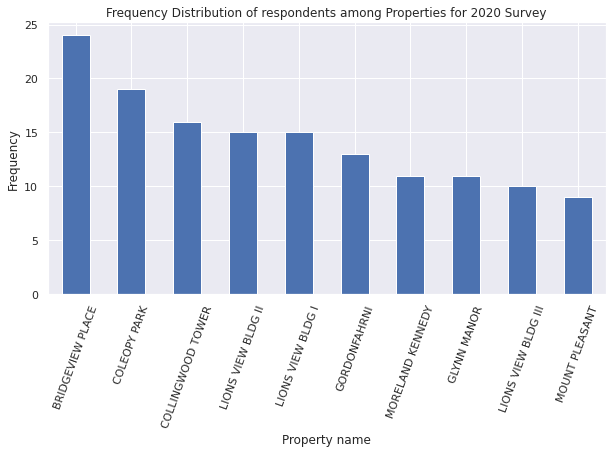

In [28]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,5))
df4.location.value_counts().sort_values(ascending=False).head(10).plot(kind='bar', rot=70);
plt.ylabel('Frequency')
plt.xlabel('Property name')
plt.title('Frequency Distribution of respondents among Properties for 2020 Survey');
# majority of respondents were from Bridgeview Place and Coleopy Park

In [70]:
df4.corr()
# mod/high corr for food_enough, _access, _variety, _afford, _worry
#    covid_info, _brief_satis, approach bside, comm_news_satisf,
#    apprch_bside, depm_admin, depm_oper
#    hlth_phys, hlth_happy
#    hlth_mental, hlth_happy
#    rlns_care, rlns_space, rlns_safe, rlns_safe_obj, rlns_welcome
#    apprch_bside, house_stable
#    hlth_phys, hlth_mental  
#    rlns_care, chat_often

,nbr_relation,sense_commun,safe_covid,food_enough,food_access,food_variety,food_afford,food_worry,covid_info_satis,covid_brief_satis,...,work_paid,work_vol,walk_aid,educ_level,imm_status,bside_dur,bside_pre,bside_pre_muni,surv_who,surv_hear
nbr_relation,1.000000,0.287513,0.144645,0.023557,-0.005617,-0.021269,-0.004132,-0.028021,-0.025958,-0.091208,...,-0.102900,-0.016061,0.138360,-0.004753,-0.046371,0.034395,-0.008121,-0.173300,-0.023104,-0.027752
sense_commun,0.287513,1.000000,0.242397,-0.056318,-0.084795,-0.028235,-0.050359,-0.111977,-0.184331,-0.179680,...,0.027044,-0.043114,0.021172,-0.015623,0.009346,0.017717,0.037231,-0.011144,-0.030050,0.151745
safe_covid,0.144645,0.242397,1.000000,-0.106396,0.051827,0.025900,-0.027415,-0.146105,-0.206834,-0.161705,...,-0.052765,-0.026503,0.019945,-0.022649,-0.103628,0.035830,-0.038736,-0.105695,0.031832,0.005993
food_enough,0.023557,-0.056318,-0.106396,1.000000,0.513075,0.581460,0.689913,0.576012,0.162876,0.143844,...,0.159415,-0.008175,-0.099018,0.051872,0.154897,-0.082126,0.142165,0.021934,-0.021604,-0.053256
food_access,-0.005617,-0.084795,0.051827,0.513075,1.000000,0.659052,0.468027,0.347913,0.199794,0.150834,...,0.104779,0.033156,0.003044,0.125812,0.179092,0.020126,0.062141,0.076247,-0.031874,-0.043960
food_variety,-0.021269,-0.028235,0.025900,0.581460,0.659052,1.000000,0.561459,0.455808,0.208254,0.100740,...,0.149889,-0.012519,-0.056936,0.145354,0.116169,-0.120435,0.136117,-0.079896,0.059595,-0.020370
food_afford,-0.004132,-0.050359,-0.027415,0.689913,0.468027,0.561459,1.000000,0.565784,0.175213,0.195408,...,0.174996,0.117763,-0.002393,0.082566,0.134816,-0.061358,0.220536,0.020981,-0.071653,-0.076369
food_worry,-0.028021,-0.111977,-0.146105,0.576012,0.347913,0.455808,0.565784,1.000000,0.150480,0.101409,...,0.118559,0.048762,-0.042861,0.122380,0.035037,-0.059617,0.135418,0.028589,0.000776,-0.021799
covid_info_satis,-0.025958,-0.184331,-0.206834,0.162876,0.199794,0.208254,0.175213,0.150480,1.000000,0.753500,...,0.108139,0.183149,-0.048414,0.099458,0.177503,0.046893,0.100563,0.191565,-0.001755,0.015689
covid_brief_satis,-0.091208,-0.179680,-0.161705,0.143844,0.150834,0.100740,0.195408,0.101409,0.753500,1.000000,...,0.174417,0.215531,0.003897,0.115507,0.087298,-0.057010,0.114160,0.157339,-0.099523,-0.016581


In [106]:
# keep food_enough, covid, apprch_bside, hlth_phys, rlns_care
# insignif surv_who
df5 = df4.drop(['food_access', 'food_variety','food_afford','food_worry',
                      'covid_info_satis', 'covid_brief_satis','comm_news_satisf',
                      'depm_admin','depm_oper',
                      'hlth_happy',
                      'rlns_space','rlns_safe','rlns_safe_obj','rlns_welcome',
                      'house_stable',
                      'hlth_phys',
                      'chat_often',
                      'surv_who', 'surv_hear'
                      ], axis=1)

In [113]:
df5.corr()


,nbr_relation,sense_commun,safe_covid,food_enough,apprch_bside,comm_reg,food_access_last_12,hlth_mental,hlth_well,time_nbr,...,work_paid,work_vol,walk_aid,educ_level,imm_status,bside_dur,bside_pre,bside_pre_muni,surv_who,surv_hear
nbr_relation,1.000000,0.287513,0.144645,0.023557,-0.076255,-0.116833,-0.083268,-0.051213,0.007154,-0.129427,...,-0.102900,-0.016061,0.138360,-0.004753,-0.046371,0.034395,-0.008121,-0.173300,-0.023104,-0.027752
sense_commun,0.287513,1.000000,0.242397,-0.056318,-0.180911,0.044064,-0.103240,-0.050231,0.033623,-0.082752,...,0.027044,-0.043114,0.021172,-0.015623,0.009346,0.017717,0.037231,-0.011144,-0.030050,0.151745
safe_covid,0.144645,0.242397,1.000000,-0.106396,-0.195652,-0.120589,-0.024240,-0.050002,-0.043838,0.032136,...,-0.052765,-0.026503,0.019945,-0.022649,-0.103628,0.035830,-0.038736,-0.105695,0.031832,0.005993
food_enough,0.023557,-0.056318,-0.106396,1.000000,0.170487,-0.028109,0.222823,0.193739,-0.019109,-0.024686,...,0.159415,-0.008175,-0.099018,0.051872,0.154897,-0.082126,0.142165,0.021934,-0.021604,-0.053256
apprch_bside,-0.076255,-0.180911,-0.195652,0.170487,1.000000,-0.009273,0.249079,0.266705,-0.125260,0.000359,...,0.150537,0.117709,-0.073386,0.057801,0.034263,-0.013526,0.047863,0.165569,-0.039332,-0.048720
comm_reg,-0.116833,0.044064,-0.120589,-0.028109,-0.009273,1.000000,0.117968,-0.054883,0.095395,0.157841,...,-0.038915,0.104480,0.036189,-0.001496,0.063106,0.037317,0.210566,0.164260,0.064584,-0.058462
food_access_last_12,-0.083268,-0.103240,-0.024240,0.222823,0.249079,0.117968,1.000000,0.272604,-0.116406,0.154979,...,0.188013,0.188773,0.038503,-0.002592,0.102251,-0.076056,0.229715,0.021012,-0.005321,-0.087250
hlth_mental,-0.051213,-0.050231,-0.050002,0.193739,0.266705,-0.054883,0.272604,1.000000,-0.146260,0.063994,...,0.275859,0.145639,0.031738,0.003364,0.049063,0.003451,0.088449,-0.087230,0.057323,-0.044568
hlth_well,0.007154,0.033623,-0.043838,-0.019109,-0.125260,0.095395,-0.116406,-0.146260,1.000000,0.123043,...,0.053492,0.005476,0.144097,0.052544,0.007105,0.079303,0.036083,0.115729,-0.060122,0.099050
time_nbr,-0.129427,-0.082752,0.032136,-0.024686,0.000359,0.157841,0.154979,0.063994,0.123043,1.000000,...,0.056491,0.149493,0.090262,0.131887,0.025847,-0.017510,0.072753,0.132785,0.054855,-0.044253


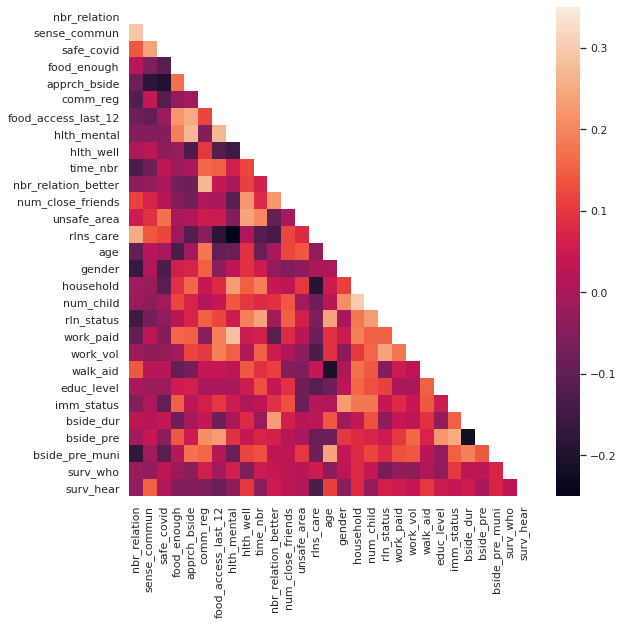

In [112]:
# finding similar findings for variables
# pca inappropriate for non-continuous vars
var = df5.columns

def corr_map(var):
    corr = df5.corr().round(2)
    max_corr = 0.35
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style('white'):
        f, ax = plt.subplots(figsize = (9,9))
        ax = sns.heatmap(corr, vmax = max_corr, mask = mask,
                        annot=False)

corr_map(var)

In [114]:
df5.head(1)
# visualization
# not too interesting: nbr_rel
#     sense_commun, except for Wilson Hts'outlier', but only 1 respondent ,
#     comm_reg, food_access_last_12,
#     time_nbr, nbr_relation_better, num_close_friends
#     gender, work_vol, walk_aid,
#     bside_pre_muni,

# might benefit with percentage conversion, considering that some properties have a low contribution response

,location,nbr_relation,sense_commun,safe_covid,food_enough,apprch_bside,comm_reg,food_access_last_12,hlth_mental,hlth_well,...,work_paid,work_vol,walk_aid,educ_level,imm_status,bside_dur,bside_pre,bside_pre_muni,surv_who,surv_hear
0,LONDONDERRY,2.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,0.0,...,3.0,3.0,2.0,5.0,1.0,2.0,2.0,0.0,1.0,2.0


safe_covid 0 = prefer not to answer, 1 = worse, 2 = no change, 3 = improved.


Cannot use average because of the options.  In general, tenants were not too concerned about covid safety breaches.

In [172]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"safe_covid","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

food_enough: 'I have not had enough food to eat.' ??  -> food NOT enough

food_enough 0 = prefer not to answer, 1 = never... 5 = all the time.  -> 5 worst

Most tenants find that food is available.

Hard to use average because of the options.


Query distribution of tenants:  Is the whole building tenanted by Brightside tenants?  How relevant is the distribution of one respondent for one building? (Very low volume in the other 'low' food availability properties)


In [169]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"food_enough","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

apprch_bside 1: very approachable

In general, tenants are happy with the approachability of BS.

In [124]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"apprch_bside","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false},"aggregate":"mean"},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

Health wellness (any health issues that BS can help with): 0 = Yes, 1 = No, 2 = prefer not to answer

In general, tenants feels that they have health issues that they need help with.

Hard to defend using average due to option 2.  However, if averages considered:
Tenants from Glynn Manor and Harwood Manor most not-needful of help for health issues.

Kings Daughters with only 2 respondents, but in the mean, rated well.

In [168]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"hlth_well","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

Unsafe area ('29. Can you identify an area in your building that makes you feel unsafe?) 0 = yes, 1 = no, 2 = prefer not to answer:  --> ie 0 ==unsafe

Probe on safety issues on almost all properties.

In [177]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"unsafe_area","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

 In general, tenants were not too concerned about covid safety breaches.

 Most tenants find that food is frequently available.

 In general, tenants are happy with the approachability of BS.

 In general, tenants feels that they have health issues that they need help with.

Probe on safety issues on almost all properties.


rlns_care (neighbours take care of each other) 0 = prefer not to answer, 1 = strongly disagree:

Tenants of Arbutus Court most satisfied.

Tenants from McLeod not satisfied with neighbour's care.

In [182]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"rln_status","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

Age 1 = < 15yrs, 2 = 15-19, 3 = 20-24, 4 = 25-34, 5 = 35-44, 6 = 45-54, 7 = 55-64,
8 = 65-74, 9 = > 75, 10 = prefer not to answer.

Majority of tenants in age group 7-9 (55 and older).

In [167]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"age","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

Most arrangements are for single-person households.

In [156]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"household","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

Num_child 1 == no child.  5 == 4 or more.  6 == prefer not to answer.

Most have 'no child'.  

In [157]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"num_child","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

rln_status 1 = single, 2 = married, 3= divorced, 4= widowed.

Most tenants are either single or divoced.

In [158]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"rln_status","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

work_paid 1 = full time, 2 = part time, 3= retired, 4 = no work.

Most tenants are retired or not working.

In [159]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"work_paid","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

educ_level 1 = < HS, 2 = HS diploma, 3= some college, 4 = technical diploma, 5 = bachelor's, 
6= professional degree, 7 = pref no answer 

Tenants have a wide-distribution of educational levels.

In [164]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"educ_level","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

imm_status 0 = immigrant, 1 = Canada-born.

A good mix of immigrants and Canadians by birth.

In [165]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"imm_status","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

Duration of living in BS building.  bside_dur 2 = 1-3 years, 3 = 4-6 years, 4 = >6yrs, 5 = prefer no answer.

A good number are long-standing tenants.

In [166]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"bside_dur","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

bside_pre 0 = other, 1 = social housing, 2 = private market housing, 3 = lived with fam,
4 = transitional housing, 5 = couch-surfing/ temp, 6 = homeless, 7 = shelter, 8 = pref not to answer.

Most tenants were on private rentals or living with family prior to moving to BS.

In [173]:
_deepnote_run_altair(df5, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"bside_pre","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
### locations distribution not very contributory in distinguishing differences because cannot use average due to the options.abs
###  --> resort back to the hist

In [44]:
df4.location.value_counts()

BRIDGEVIEW PLACE        24
COLEOPY PARK            19
COLLINGWOOD TOWER       16
LIONS VIEW BLDG II      15
LIONS VIEW BLDG I       15
GORDONFAHRNI            13
MORELAND KENNEDY        11
GLYNN MANOR             11
LIONS VIEW BLDG III     10
MOUNT PLEASANT           9
SOROPTIMIST LIONS        9
WALLACE WILSON           9
MAGNOLO MANOR            7
LONDONDERRY              7
ARBUTUS COURT            7
ALICE SAUNDERS           7
BURRARD MANOR            6
FLORENCE MANOR           5
LOYAL ORANGE             5
HARWOOD MANOR            5
MUIR MANOR               4
MACLEOD MANOR            4
KINGS DAUGHTERS          2
FIRST LUTHERAN COURT     1
EDWARD BYERS             1
WILSON HEIGHTS MANOR     1
Name: location, dtype: int64

In [50]:
df4.head(1)

,location,nbr_relation,sense_commun,safe_covid,food_enough,food_access,food_variety,food_afford,food_worry,covid_info_satis,...,work_paid,work_vol,walk_aid,educ_level,imm_status,bside_dur,bside_pre,bside_pre_muni,surv_who,surv_hear
0,LONDONDERRY,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,3.0,3.0,2.0,5.0,1.0,2.0,2.0,0.0,1.0,2.0


In [ ]:
df4 [ df4.location == 'Wilson']

In [9]:
_deepnote_run_altair(df4, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"location","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"nbr_relation","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ec36858b-3dda-48ee-b585-815a2bd46f62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>